In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re
import nltk
#nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
#nltk.download("wordnet")
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud

**loading data** *italicized text*

In [ ]:
df = pd.read_csv('/content/sample_data/financial_loan.csv')
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [ ]:
df.shape

(38576, 24)

cleaing data

In [ ]:
# Percentage of data points per purpose
df["purpose"].value_counts()/len(df["purpose"])*100

Debt consolidation    47.215886
credit card           12.956242
other                  9.912899
home improvement       7.455413
major purchase         5.469722
small business         4.603899
car                    3.880651
wedding                2.405641
medical                1.729054
moving                 1.449088
house                  0.948776
vacation               0.912484
educational            0.816570
renewable_energy       0.243675
Name: purpose, dtype: float64

In [56]:
df.groupby('purpose')['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
purpose,,,,,,,,
Debt consolidation,18214.0,22.883002,11.332352,2.0,14.0,21.0,30.00,90.0
car,1497.0,20.673347,11.694909,3.0,12.0,19.0,28.00,67.0
credit card,4998.0,23.031212,11.087759,2.0,15.0,21.0,30.00,80.0
educational,315.0,18.584127,11.949005,2.0,9.0,16.0,25.50,63.0
home improvement,2876.0,24.224270,11.344447,3.0,16.0,23.0,31.00,77.0
house,366.0,21.202186,11.584713,2.0,12.0,19.0,27.00,62.0
major purchase,2110.0,19.861611,11.387264,3.0,11.0,18.0,26.00,81.0
medical,667.0,21.664168,11.768078,3.0,13.0,19.0,28.00,63.0
moving,559.0,18.935599,11.008117,3.0,10.0,17.0,26.00,63.0


In [48]:
#cleaning the null values from the given data
df = df.loc[df['emp_title'] != 'None', :]
df.head()



,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_payment_date,loan_status,...,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,year,last_credit_pull_year
0,1077430,NaN,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-04-2021,Charged Off,...,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009,2021,2021
1,1072053,NaN,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,15-01-2021,Fully Paid,...,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939,2021,2021
2,1069243,NaN,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,09-01-2021,Charged Off,...,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522,2021,2021
3,1041756,NaN,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-03-2021,Fully Paid,...,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911,2021,2021
4,1068350,NaN,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,15-01-2021,Fully Paid,...,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835,2021,2021


from matplotlib import pyplot as plt
_df_56['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_57['member_id'].plot(kind='hist', bins=20, title='member_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_58['annual_income'].plot(kind='hist', bins=20, title='annual_income')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_59['dti'].plot(kind='hist', bins=20, title='dti')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_60.groupby('emp_length').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_61.groupby('emp_title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_62.groupby('grade').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_63.groupby('home_ownership').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_64.plot(kind='scatter', x='id', y='member_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_65.plot(kind='scatter', x='member_id', y='annual_income', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_66.plot(kind='scatter', x='annual_income', y='dti', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_67.plot(kind='scatter', x='dti', y='installment', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['issue_date']
  ys = series['id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_68.sort_values('issue_date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('emp_length')):
  _plot_series(series, series_name, i)
  fig.legend(title='emp_length', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('issue_date')
_ = plt.ylabel('id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['issue_date']
  ys = series['id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_69.sort_values('issue_date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('emp_title')):
  _plot_series(series, series_name, i)
  fig.legend(title='emp_title', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('issue_date')
_ = plt.ylabel('id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['issue_date']
  ys = series['id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_70.sort_values('issue_date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('grade')):
  _plot_series(series, series_name, i)
  fig.legend(title='grade', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('issue_date')
_ = plt.ylabel('id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['issue_date']
  ys = series['id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_71.sort_values('issue_date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('home_ownership')):
  _plot_series(series, series_name, i)
  fig.legend(title='home_ownership', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('issue_date')
_ = plt.ylabel('id')

from matplotlib import pyplot as plt
_df_72['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_73['member_id'].plot(kind='line', figsize=(8, 4), title='member_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_74['annual_income'].plot(kind='line', figsize=(8, 4), title='annual_income')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_75['dti'].plot(kind='line', figsize=(8, 4), title='dti')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['emp_title'].value_counts()
    for x_label, grp in _df_76.groupby('emp_length')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('emp_length')
_ = plt.ylabel('emp_title')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['grade'].value_counts()
    for x_label, grp in _df_77.groupby('emp_title')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('emp_title')
_ = plt.ylabel('grade')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['home_ownership'].value_counts()
    for x_label, grp in _df_78.groupby('grade')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('grade')
_ = plt.ylabel('home_ownership')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['issue_date'].value_counts()
    for x_label, grp in _df_79.groupby('home_ownership')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('home_ownership')
_ = plt.ylabel('issue_date')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_80['emp_length'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_80, x='id', y='emp_length', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_81['emp_title'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_81, x='id', y='emp_title', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_82['grade'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_82, x='id', y='grade', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_83['home_ownership'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_83, x='id', y='home_ownership', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

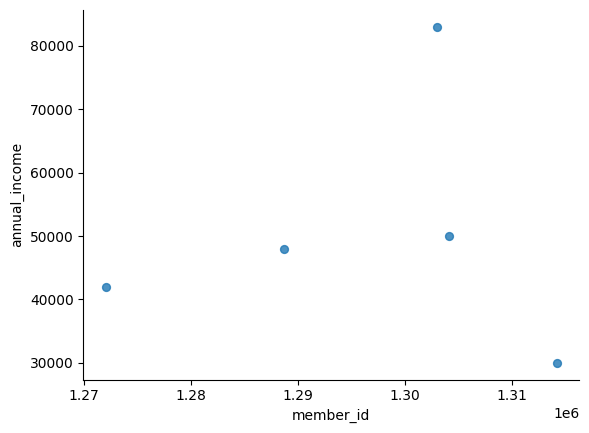

In [53]:
from matplotlib import pyplot as plt
_df_65.plot(kind='scatter', x='member_id', y='annual_income', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

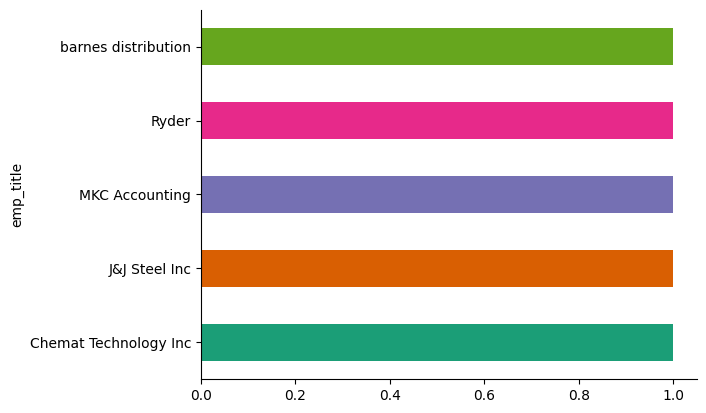

In [50]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_61.groupby('emp_title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

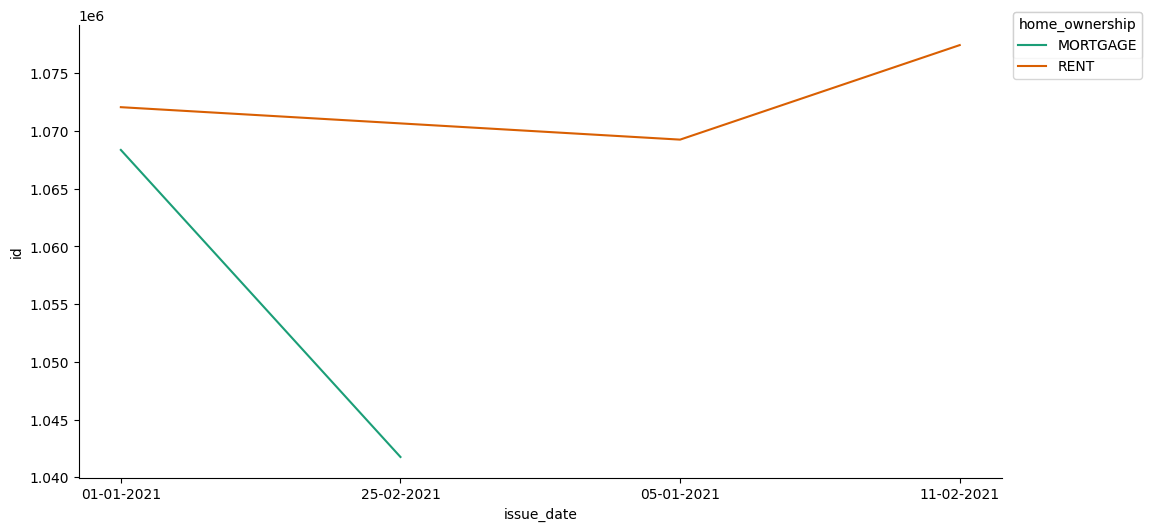

In [49]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['issue_date']
  ys = series['id']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_71.sort_values('issue_date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('home_ownership')):
  _plot_series(series, series_name, i)
  fig.legend(title='home_ownership', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('issue_date')
_ = plt.ylabel('id')

EDA
